In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import os

In [2]:
health_centers = pd.read_excel(os.path.join("..","Data","Original_Files","HRSAData","Data_Explorer_Dataset_v2.xlsx"))
health_centers

,Site Name,Services Delivered at Site,Health Center Type,Health Center Type Code,Health Center Location Type,Health Center Location Type Code,Health Center Location Setting,Health Center Location Setting Code,County,State,...,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Site Population Type Code,Health Center Operational Schedule Description,Health Center Operational Schedule Code
0,White House Clinic - Irvine,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Estill County,KY,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
1,La Clinica School-Based Health Center at Phoen...,1,Service Delivery Site,1,Seasonal,2,School,3,Jackson County,OR,...,1,1,0,1,1,0,Urban,1.0,Full-Time,1.0
2,South Side School,1,Service Delivery Site,1,Seasonal,2,School,3,Hartford County,CT,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
3,CHC/SEK Southeast High School,1,Service Delivery Site,1,Seasonal,2,School,3,Crawford County,KS,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
4,Cornerstone Family Healthcare: The Center for ...,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Orange County,NY,...,0,1,0,1,1,0,Urban,1.0,Full-Time,1.0
5,Administrative Offices,0,Administrative,3,Permanent,1,Unknown,7,Pierce County,WA,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
6,Ofu Community Health Center,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Western District,AS,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
7,ARcare - 45,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Jackson County,AR,...,1,1,0,1,0,0,Unknown,4.0,Unknown,3.0
8,Third Street Primary Care Clinic,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,New York County,NY,...,0,1,0,0,1,0,Urban,1.0,Unknown,3.0
9,RIVER VALLEY PRIMARY CARE SERVICES INC.,1,Administrative/Service Delivery Site,2,Permanent,1,All Other Clinic Types,6,Logan County,AR,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0


In [3]:
health_centers.State.unique()

array(['KY', 'OR', 'CT', 'KS', 'NY', 'WA', 'AS', 'AR', 'IL', 'GA', 'IN',
       'FL', 'MI', 'TX', 'VT', 'DE', 'OH', 'IA', 'NC', 'CA', 'DC', 'AZ',
       'MD', 'NE', 'ID', 'MS', 'AK', 'PA', 'VA', 'LA', 'WI', 'CO', 'OK',
       'TN', 'UT', 'MO', 'HI', 'SC', 'MA', 'WV', 'MT', 'WY', 'NM', 'NV',
       'SD', 'NH', 'ME', 'AL', 'NJ', 'MN', 'ND', 'RI', 'PR', 'FM', 'PW',
       'MH', 'MP', 'VI', 'GU', 'XX'], dtype=object)

In [4]:
provinces = ['AS','PR','FM','PW','MH','MP','VI','GU','XX']
us_health_centers = health_centers[~health_centers.State.isin(provinces)]
us_health_centers

,Site Name,Services Delivered at Site,Health Center Type,Health Center Type Code,Health Center Location Type,Health Center Location Type Code,Health Center Location Setting,Health Center Location Setting Code,County,State,...,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Site Population Type Code,Health Center Operational Schedule Description,Health Center Operational Schedule Code
0,White House Clinic - Irvine,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Estill County,KY,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
1,La Clinica School-Based Health Center at Phoen...,1,Service Delivery Site,1,Seasonal,2,School,3,Jackson County,OR,...,1,1,0,1,1,0,Urban,1.0,Full-Time,1.0
2,South Side School,1,Service Delivery Site,1,Seasonal,2,School,3,Hartford County,CT,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
3,CHC/SEK Southeast High School,1,Service Delivery Site,1,Seasonal,2,School,3,Crawford County,KS,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
4,Cornerstone Family Healthcare: The Center for ...,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Orange County,NY,...,0,1,0,1,1,0,Urban,1.0,Full-Time,1.0
5,Administrative Offices,0,Administrative,3,Permanent,1,Unknown,7,Pierce County,WA,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
7,ARcare - 45,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Jackson County,AR,...,1,1,0,1,0,0,Unknown,4.0,Unknown,3.0
8,Third Street Primary Care Clinic,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,New York County,NY,...,0,1,0,0,1,0,Urban,1.0,Unknown,3.0
9,RIVER VALLEY PRIMARY CARE SERVICES INC.,1,Administrative/Service Delivery Site,2,Permanent,1,All Other Clinic Types,6,Logan County,AR,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
10,MID LAKES MEDICAL AND DENTAL BUILDING,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Lake County,IL,...,0,1,0,0,0,0,Urban,1.0,Full-Time,1.0


In [5]:
us_health_centers_id = us_health_centers.assign(id=(us_health_centers['Site Name'] + '_' + us_health_centers['FIPS']).astype('category').cat.codes)
us_health_centers_id.head()

,Site Name,Services Delivered at Site,Health Center Type,Health Center Type Code,Health Center Location Type,Health Center Location Type Code,Health Center Location Setting,Health Center Location Setting Code,County,State,...,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Site Population Type Code,Health Center Operational Schedule Description,Health Center Operational Schedule Code,id
0,White House Clinic - Irvine,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Estill County,KY,...,1,0,0,0,0,Rural,2.0,Full-Time,1.0,13180
1,La Clinica School-Based Health Center at Phoen...,1,Service Delivery Site,1,Seasonal,2,School,3,Jackson County,OR,...,1,0,1,1,0,Urban,1.0,Full-Time,1.0,7141
2,South Side School,1,Service Delivery Site,1,Seasonal,2,School,3,Hartford County,CT,...,1,0,0,0,0,Unknown,4.0,Unknown,3.0,11402
3,CHC/SEK Southeast High School,1,Service Delivery Site,1,Seasonal,2,School,3,Crawford County,KS,...,1,0,0,0,0,Unknown,4.0,Unknown,3.0,1779
4,Cornerstone Family Healthcare: The Center for ...,1,Service Delivery Site,1,Permanent,1,All Other Clinic Types,6,Orange County,NY,...,1,0,1,1,0,Urban,1.0,Full-Time,1.0,3311


In [6]:
cols_to_move = ['id','Site Name','County','State','FIPS']
us_health_centers_id = us_health_centers_id[ cols_to_move + [ col for col in us_health_centers_id.columns if col not in cols_to_move ] ]
us_health_centers_id

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type,Health Center Type Code,Health Center Location Type,Health Center Location Type Code,...,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Site Population Type Code,Health Center Operational Schedule Description,Health Center Operational Schedule Code
0,13180,White House Clinic - Irvine,Estill County,KY,21065,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
1,7141,La Clinica School-Based Health Center at Phoen...,Jackson County,OR,41029,1,Service Delivery Site,1,Seasonal,2,...,1,1,0,1,1,0,Urban,1.0,Full-Time,1.0
2,11402,South Side School,Hartford County,CT,09003,1,Service Delivery Site,1,Seasonal,2,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
3,1779,CHC/SEK Southeast High School,Crawford County,KS,20037,1,Service Delivery Site,1,Seasonal,2,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
4,3311,Cornerstone Family Healthcare: The Center for ...,Orange County,NY,36071,1,Service Delivery Site,1,Permanent,1,...,0,1,0,1,1,0,Urban,1.0,Full-Time,1.0
5,487,Administrative Offices,Pierce County,WA,53053,0,Administrative,3,Permanent,1,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
7,323,ARcare - 45,Jackson County,AR,05067,1,Service Delivery Site,1,Permanent,1,...,1,1,0,1,0,0,Unknown,4.0,Unknown,3.0
8,12167,Third Street Primary Care Clinic,New York County,NY,36061,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,1,0,Urban,1.0,Unknown,3.0
9,10225,RIVER VALLEY PRIMARY CARE SERVICES INC.,Logan County,AR,05083,1,Administrative/Service Delivery Site,2,Permanent,1,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
10,7720,MID LAKES MEDICAL AND DENTAL BUILDING,Lake County,IL,17097,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,0,0,Urban,1.0,Full-Time,1.0


In [7]:
us_health_centers_id.loc[us_health_centers_id.isnull().any(axis=1)]

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type,Health Center Type Code,Health Center Location Type,Health Center Location Type Code,...,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Site Population Type Code,Health Center Operational Schedule Description,Health Center Operational Schedule Code
1680,13201,Whitman-Walker WeWork,District of Columbia,DC,11001,1,Administrative/Service Delivery Site,2,Permanent,1,...,#0/A,#0/A,#0/A,#0/A,#0/A,#0/A,NaN,NaN,NaN,NaN
1985,-1,NATIVE Health of Spokane,Spokane County,WA,NaN,1,Administrative/Service Delivery Site,2,Permanent,1,...,#0/A,#0/A,#0/A,#0/A,#0/A,#0/A,NaN,NaN,NaN,NaN
4510,-1,Eisner Health Family Planning Clinic at Metrop...,Los Angeles County,CA,NaN,1,Service Delivery Site,1,Permanent,1,...,#0/A,#0/A,#0/A,#0/A,#0/A,#0/A,NaN,NaN,NaN,NaN
5729,-1,Callen-Lorde Community Health Center Mobile Pr...,New York County,NY,NaN,1,Service Delivery Site,1,Mobile Van,3,...,#0/A,#0/A,#0/A,#0/A,#0/A,#0/A,NaN,NaN,NaN,NaN
10189,-1,Aria Community Health Center - Mobile 1,Kings County,CA,NaN,1,Service Delivery Site,1,Mobile Van,3,...,#0/A,#0/A,#0/A,#0/A,#0/A,#0/A,NaN,NaN,NaN,NaN
10476,9190,OHSU Family Medicine at Richmond Walk-In Clinic,Multnomah County,OR,41051,1,Service Delivery Site,1,Permanent,1,...,#0/A,#0/A,#0/A,#0/A,#0/A,#0/A,NaN,NaN,NaN,NaN
11081,-1,Northeast Health Resource Center,Travis County,TX,NaN,1,Service Delivery Site,1,Permanent,1,...,#0/A,#0/A,#0/A,#0/A,#0/A,#0/A,NaN,NaN,NaN,NaN
12273,12582,VPCHC - Clinton OPC Site,Vermillion County,IN,18165,0,Administrative,3,Permanent,1,...,#0/A,#0/A,#0/A,#0/A,#0/A,#0/A,NaN,NaN,NaN,NaN


In [8]:
us_health_centers_id = us_health_centers_id.dropna()
us_health_centers_id

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type,Health Center Type Code,Health Center Location Type,Health Center Location Type Code,...,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Site Population Type Code,Health Center Operational Schedule Description,Health Center Operational Schedule Code
0,13180,White House Clinic - Irvine,Estill County,KY,21065,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
1,7141,La Clinica School-Based Health Center at Phoen...,Jackson County,OR,41029,1,Service Delivery Site,1,Seasonal,2,...,1,1,0,1,1,0,Urban,1.0,Full-Time,1.0
2,11402,South Side School,Hartford County,CT,09003,1,Service Delivery Site,1,Seasonal,2,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
3,1779,CHC/SEK Southeast High School,Crawford County,KS,20037,1,Service Delivery Site,1,Seasonal,2,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
4,3311,Cornerstone Family Healthcare: The Center for ...,Orange County,NY,36071,1,Service Delivery Site,1,Permanent,1,...,0,1,0,1,1,0,Urban,1.0,Full-Time,1.0
5,487,Administrative Offices,Pierce County,WA,53053,0,Administrative,3,Permanent,1,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
7,323,ARcare - 45,Jackson County,AR,05067,1,Service Delivery Site,1,Permanent,1,...,1,1,0,1,0,0,Unknown,4.0,Unknown,3.0
8,12167,Third Street Primary Care Clinic,New York County,NY,36061,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,1,0,Urban,1.0,Unknown,3.0
9,10225,RIVER VALLEY PRIMARY CARE SERVICES INC.,Logan County,AR,05083,1,Administrative/Service Delivery Site,2,Permanent,1,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
10,7720,MID LAKES MEDICAL AND DENTAL BUILDING,Lake County,IL,17097,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,0,0,Urban,1.0,Full-Time,1.0


In [9]:
blanks = us_health_centers_id[us_health_centers_id['FIPS'] == '     ']
blanks

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type,Health Center Type Code,Health Center Location Type,Health Center Location Type Code,...,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Site Population Type Code,Health Center Operational Schedule Description,Health Center Operational Schedule Code
2124,5481,HIGHLAND WELLNESS HCP ANNEX,Not Determined,CA,,1,Service Delivery Site,1,Permanent,1,...,0,0,0,0,1,U,Unknown,4.0,Unknown,3.0
5930,1025,BORREGO COMMUNITY HEALTH FOUNDATION ADMINISTRA...,Not Determined,CA,,0,Administrative,3,Permanent,1,...,1,1,0,0,0,U,Unknown,4.0,Unknown,3.0
13252,10594,SAME DAY CLINIC AT HIGHLAND WELLNESS,Not Determined,CA,,1,Service Delivery Site,1,Permanent,1,...,0,0,0,0,1,U,Urban,1.0,Full-Time,1.0


In [10]:
us_health_centers_id = us_health_centers_id[us_health_centers_id['FIPS'] != '     '].copy(deep=False)
us_health_centers_id

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type,Health Center Type Code,Health Center Location Type,Health Center Location Type Code,...,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Description,Health Center Site Population Type Code,Health Center Operational Schedule Description,Health Center Operational Schedule Code
0,13180,White House Clinic - Irvine,Estill County,KY,21065,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
1,7141,La Clinica School-Based Health Center at Phoen...,Jackson County,OR,41029,1,Service Delivery Site,1,Seasonal,2,...,1,1,0,1,1,0,Urban,1.0,Full-Time,1.0
2,11402,South Side School,Hartford County,CT,09003,1,Service Delivery Site,1,Seasonal,2,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
3,1779,CHC/SEK Southeast High School,Crawford County,KS,20037,1,Service Delivery Site,1,Seasonal,2,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
4,3311,Cornerstone Family Healthcare: The Center for ...,Orange County,NY,36071,1,Service Delivery Site,1,Permanent,1,...,0,1,0,1,1,0,Urban,1.0,Full-Time,1.0
5,487,Administrative Offices,Pierce County,WA,53053,0,Administrative,3,Permanent,1,...,0,1,0,0,0,0,Unknown,4.0,Unknown,3.0
7,323,ARcare - 45,Jackson County,AR,05067,1,Service Delivery Site,1,Permanent,1,...,1,1,0,1,0,0,Unknown,4.0,Unknown,3.0
8,12167,Third Street Primary Care Clinic,New York County,NY,36061,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,1,0,Urban,1.0,Unknown,3.0
9,10225,RIVER VALLEY PRIMARY CARE SERVICES INC.,Logan County,AR,05083,1,Administrative/Service Delivery Site,2,Permanent,1,...,0,1,0,0,0,0,Rural,2.0,Full-Time,1.0
10,7720,MID LAKES MEDICAL AND DENTAL BUILDING,Lake County,IL,17097,1,Service Delivery Site,1,Permanent,1,...,0,1,0,0,0,0,Urban,1.0,Full-Time,1.0


In [11]:
list(us_health_centers_id.columns.values)

['id',
 'Site Name',
 'County',
 'State',
 'FIPS',
 'Services Delivered at Site',
 'Health Center Type',
 'Health Center Type Code',
 'Health Center Location Type',
 'Health Center Location Type Code',
 'Health Center Location Setting',
 'Health Center Location Setting Code',
 'Migrant Health Centers HRSA Grant Subprogram Indicator',
 'Community Health HRSA Grant Subprogram Indicator',
 'School Based Health Center HRSA Grant Subprogram Indicator',
 'Public Housing HRSA Grant Subprogram Indicator',
 'Health Care for the Homeless HRSA Grant Subprogram Indicator',
 'U.S. - Mexico Border 100 Kilometer Indicator',
 'Health Center Site Population Type Description',
 'Health Center Site Population Type Code',
 'Health Center Operational Schedule Description',
 'Health Center Operational Schedule Code']

In [12]:
us_health_centers_id = us_health_centers_id.drop(['Health Center Type',
                'Health Center Location Type',
                'Health Center Location Setting',
                'Health Center Site Population Type Description',
                'Health Center Operational Schedule Description'], 
               axis=1)
us_health_centers_id.head()

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type Code,Health Center Location Type Code,Health Center Location Setting Code,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Code,Health Center Operational Schedule Code
0,13180,White House Clinic - Irvine,Estill County,KY,21065,1,1,1,6,0,1,0,0,0,0,2.0,1.0
1,7141,La Clinica School-Based Health Center at Phoen...,Jackson County,OR,41029,1,1,2,3,1,1,0,1,1,0,1.0,1.0
2,11402,South Side School,Hartford County,CT,09003,1,1,2,3,0,1,0,0,0,0,4.0,3.0
3,1779,CHC/SEK Southeast High School,Crawford County,KS,20037,1,1,2,3,0,1,0,0,0,0,4.0,3.0
4,3311,Cornerstone Family Healthcare: The Center for ...,Orange County,NY,36071,1,1,1,6,0,1,0,1,1,0,1.0,1.0


In [13]:
us_health_centers_id.dtypes

id                                                                int16
Site Name                                                        object
County                                                           object
State                                                            object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator           object
Community Health HRSA Grant Subprogram Indicator                 object
School Based Health Center HRSA Grant Subprogram Indicator       object
Public Housing HRSA Grant Subprogram Indicator                   object
Health Care for the Homeless HRSA Grant Subprogram Indicator    

In [14]:
CT_test = us_health_centers_id[us_health_centers_id['FIPS'] == '09003']
CT_test

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type Code,Health Center Location Type Code,Health Center Location Setting Code,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Code,Health Center Operational Schedule Code
2,11402,South Side School,Hartford County,CT,09003,1,1,2,3,0,1,0,0,0,0,4.0,3.0
91,96,A.I. PRINCE TECHNICAL SCHOOL,Hartford County,CT,09003,1,1,2,3,0,1,0,1,1,0,1.0,2.0
306,5014,Gaffney Elementary School - SBHC,Hartford County,CT,09003,1,1,1,3,0,1,0,0,1,0,4.0,3.0
344,2030,COMMUNITY HEALTH CENTER OF ENFIELD,Hartford County,CT,09003,1,2,1,6,0,1,0,0,1,0,1.0,1.0
580,6529,Jefferson Elementary School SBHC,Hartford County,CT,09003,1,1,1,3,0,1,0,0,1,0,4.0,3.0
794,10484,Roosevelt Middle School SBHC,Hartford County,CT,09003,1,1,1,3,0,1,0,0,1,0,1.0,3.0
1271,10139,Prudence Crandall School SBHC,Hartford County,CT,09003,1,1,1,3,0,1,0,0,1,0,4.0,3.0
1289,490,Administrative office Founders Plaza,Hartford County,CT,09003,0,3,1,7,,,,,,0,4.0,3.0
1506,1428,Bristol Technical High School,Hartford County,CT,09003,1,1,1,3,0,1,0,0,1,0,1.0,1.0
1587,4064,Enfield Street School SBHC,Hartford County,CT,09003,1,1,1,3,0,1,0,0,1,0,4.0,3.0


In [15]:
CT_test['FIPS'] = CT_test['FIPS'].astype(float)
CT_test['FIPS'] = CT_test['FIPS'].astype(np.int64).astype(str)
CT_test.dtypes

C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


id                                                                int16
Site Name                                                        object
County                                                           object
State                                                            object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator           object
Community Health HRSA Grant Subprogram Indicator                 object
School Based Health Center HRSA Grant Subprogram Indicator       object
Public Housing HRSA Grant Subprogram Indicator                   object
Health Care for the Homeless HRSA Grant Subprogram Indicator    

In [16]:
CT_test

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type Code,Health Center Location Type Code,Health Center Location Setting Code,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Code,Health Center Operational Schedule Code
2,11402,South Side School,Hartford County,CT,9003,1,1,2,3,0,1,0,0,0,0,4.0,3.0
91,96,A.I. PRINCE TECHNICAL SCHOOL,Hartford County,CT,9003,1,1,2,3,0,1,0,1,1,0,1.0,2.0
306,5014,Gaffney Elementary School - SBHC,Hartford County,CT,9003,1,1,1,3,0,1,0,0,1,0,4.0,3.0
344,2030,COMMUNITY HEALTH CENTER OF ENFIELD,Hartford County,CT,9003,1,2,1,6,0,1,0,0,1,0,1.0,1.0
580,6529,Jefferson Elementary School SBHC,Hartford County,CT,9003,1,1,1,3,0,1,0,0,1,0,4.0,3.0
794,10484,Roosevelt Middle School SBHC,Hartford County,CT,9003,1,1,1,3,0,1,0,0,1,0,1.0,3.0
1271,10139,Prudence Crandall School SBHC,Hartford County,CT,9003,1,1,1,3,0,1,0,0,1,0,4.0,3.0
1289,490,Administrative office Founders Plaza,Hartford County,CT,9003,0,3,1,7,,,,,,0,4.0,3.0
1506,1428,Bristol Technical High School,Hartford County,CT,9003,1,1,1,3,0,1,0,0,1,0,1.0,1.0
1587,4064,Enfield Street School SBHC,Hartford County,CT,9003,1,1,1,3,0,1,0,0,1,0,4.0,3.0


In [17]:
us_health_centers_id['FIPS'] = us_health_centers_id['FIPS'].astype(float)
us_health_centers_id['FIPS'] = us_health_centers_id['FIPS'].astype(np.int64).astype(str)
us_health_centers_id.dtypes

id                                                                int16
Site Name                                                        object
County                                                           object
State                                                            object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator           object
Community Health HRSA Grant Subprogram Indicator                 object
School Based Health Center HRSA Grant Subprogram Indicator       object
Public Housing HRSA Grant Subprogram Indicator                   object
Health Care for the Homeless HRSA Grant Subprogram Indicator    

In [18]:
all_county_ranks = pd.read_csv(os.path.join("..","Data","Cleaned_Files","All_Years_County_Health_Ranking_Data.csv"))[['FIPS','Year','Health_Outcomes_Rank']]
all_county_ranks

,FIPS,Year,Health_Outcomes_Rank
0,1000.0,2020,0
1,1001.0,2020,6.0
2,1003.0,2020,2.0
3,1005.0,2020,45.0
4,1007.0,2020,34.0
5,1009.0,2020,24.0
6,1011.0,2020,56.0
7,1013.0,2020,64.0
8,1015.0,2020,42.0
9,1017.0,2020,44.0


In [19]:
all_county_ranks['FIPS'] = all_county_ranks['FIPS'].astype(np.int64).astype(str)
all_county_ranks.dtypes

FIPS                    object
Year                     int64
Health_Outcomes_Rank    object
dtype: object

In [20]:
all_county_ranks_2020 = all_county_ranks[all_county_ranks['Year'] == 2020].copy(deep=False)
all_county_ranks_2020

,FIPS,Year,Health_Outcomes_Rank
0,1000,2020,0
1,1001,2020,6.0
2,1003,2020,2.0
3,1005,2020,45.0
4,1007,2020,34.0
5,1009,2020,24.0
6,1011,2020,56.0
7,1013,2020,64.0
8,1015,2020,42.0
9,1017,2020,44.0


In [21]:
health_centers_county_rank = pd.merge(us_health_centers_id, all_county_ranks_2020, on='FIPS', how='left')
health_centers_county_rank

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type Code,Health Center Location Type Code,Health Center Location Setting Code,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Code,Health Center Operational Schedule Code,Year,Health_Outcomes_Rank
0,13180,White House Clinic - Irvine,Estill County,KY,21065,1,1,1,6,0,1,0,0,0,0,2.0,1.0,2020.0,103.0
1,7141,La Clinica School-Based Health Center at Phoen...,Jackson County,OR,41029,1,1,2,3,1,1,0,1,1,0,1.0,1.0,2020.0,18
2,11402,South Side School,Hartford County,CT,9003,1,1,2,3,0,1,0,0,0,0,4.0,3.0,2020.0,6.0
3,1779,CHC/SEK Southeast High School,Crawford County,KS,20037,1,1,2,3,0,1,0,0,0,0,4.0,3.0,2020.0,91
4,3311,Cornerstone Family Healthcare: The Center for ...,Orange County,NY,36071,1,1,1,6,0,1,0,1,1,0,1.0,1.0,2020.0,11.0
5,487,Administrative Offices,Pierce County,WA,53053,0,3,1,7,0,1,0,0,0,0,4.0,3.0,2020.0,22.0
6,323,ARcare - 45,Jackson County,AR,5067,1,1,1,6,1,1,0,1,0,0,4.0,3.0,2020.0,62.0
7,12167,Third Street Primary Care Clinic,New York County,NY,36061,1,1,1,6,0,1,0,0,1,0,1.0,3.0,2020.0,6.0
8,10225,RIVER VALLEY PRIMARY CARE SERVICES INC.,Logan County,AR,5083,1,2,1,6,0,1,0,0,0,0,2.0,1.0,2020.0,38.0
9,7720,MID LAKES MEDICAL AND DENTAL BUILDING,Lake County,IL,17097,1,1,1,6,0,1,0,0,0,0,1.0,1.0,2020.0,4.0


In [22]:
health_centers_county_rank.loc[health_centers_county_rank.isnull().any(axis=1)]

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type Code,Health Center Location Type Code,Health Center Location Setting Code,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Code,Health Center Operational Schedule Code,Year,Health_Outcomes_Rank
10913,3915,Eastern Community Health Center,Ingham County,MI,70150,1,1,1,3,0,1,0,0,0,0,2.0,1.0,NaN,NaN


In [23]:
health_centers_county_rank = health_centers_county_rank.dropna()
health_centers_county_rank

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type Code,Health Center Location Type Code,Health Center Location Setting Code,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Code,Health Center Operational Schedule Code,Year,Health_Outcomes_Rank
0,13180,White House Clinic - Irvine,Estill County,KY,21065,1,1,1,6,0,1,0,0,0,0,2.0,1.0,2020.0,103.0
1,7141,La Clinica School-Based Health Center at Phoen...,Jackson County,OR,41029,1,1,2,3,1,1,0,1,1,0,1.0,1.0,2020.0,18
2,11402,South Side School,Hartford County,CT,9003,1,1,2,3,0,1,0,0,0,0,4.0,3.0,2020.0,6.0
3,1779,CHC/SEK Southeast High School,Crawford County,KS,20037,1,1,2,3,0,1,0,0,0,0,4.0,3.0,2020.0,91
4,3311,Cornerstone Family Healthcare: The Center for ...,Orange County,NY,36071,1,1,1,6,0,1,0,1,1,0,1.0,1.0,2020.0,11.0
5,487,Administrative Offices,Pierce County,WA,53053,0,3,1,7,0,1,0,0,0,0,4.0,3.0,2020.0,22.0
6,323,ARcare - 45,Jackson County,AR,5067,1,1,1,6,1,1,0,1,0,0,4.0,3.0,2020.0,62.0
7,12167,Third Street Primary Care Clinic,New York County,NY,36061,1,1,1,6,0,1,0,0,1,0,1.0,3.0,2020.0,6.0
8,10225,RIVER VALLEY PRIMARY CARE SERVICES INC.,Logan County,AR,5083,1,2,1,6,0,1,0,0,0,0,2.0,1.0,2020.0,38.0
9,7720,MID LAKES MEDICAL AND DENTAL BUILDING,Lake County,IL,17097,1,1,1,6,0,1,0,0,0,0,1.0,1.0,2020.0,4.0


In [24]:
centers_with_county_ranks = health_centers_county_rank[(health_centers_county_rank.Health_Outcomes_Rank != 'NR')].copy(deep=False)
centers_with_county_ranks

,id,Site Name,County,State,FIPS,Services Delivered at Site,Health Center Type Code,Health Center Location Type Code,Health Center Location Setting Code,Migrant Health Centers HRSA Grant Subprogram Indicator,Community Health HRSA Grant Subprogram Indicator,School Based Health Center HRSA Grant Subprogram Indicator,Public Housing HRSA Grant Subprogram Indicator,Health Care for the Homeless HRSA Grant Subprogram Indicator,U.S. - Mexico Border 100 Kilometer Indicator,Health Center Site Population Type Code,Health Center Operational Schedule Code,Year,Health_Outcomes_Rank
0,13180,White House Clinic - Irvine,Estill County,KY,21065,1,1,1,6,0,1,0,0,0,0,2.0,1.0,2020.0,103.0
1,7141,La Clinica School-Based Health Center at Phoen...,Jackson County,OR,41029,1,1,2,3,1,1,0,1,1,0,1.0,1.0,2020.0,18
2,11402,South Side School,Hartford County,CT,9003,1,1,2,3,0,1,0,0,0,0,4.0,3.0,2020.0,6.0
3,1779,CHC/SEK Southeast High School,Crawford County,KS,20037,1,1,2,3,0,1,0,0,0,0,4.0,3.0,2020.0,91
4,3311,Cornerstone Family Healthcare: The Center for ...,Orange County,NY,36071,1,1,1,6,0,1,0,1,1,0,1.0,1.0,2020.0,11.0
5,487,Administrative Offices,Pierce County,WA,53053,0,3,1,7,0,1,0,0,0,0,4.0,3.0,2020.0,22.0
6,323,ARcare - 45,Jackson County,AR,5067,1,1,1,6,1,1,0,1,0,0,4.0,3.0,2020.0,62.0
7,12167,Third Street Primary Care Clinic,New York County,NY,36061,1,1,1,6,0,1,0,0,1,0,1.0,3.0,2020.0,6.0
8,10225,RIVER VALLEY PRIMARY CARE SERVICES INC.,Logan County,AR,5083,1,2,1,6,0,1,0,0,0,0,2.0,1.0,2020.0,38.0
9,7720,MID LAKES MEDICAL AND DENTAL BUILDING,Lake County,IL,17097,1,1,1,6,0,1,0,0,0,0,1.0,1.0,2020.0,4.0


In [25]:
centers_with_county_ranks.dtypes

id                                                                int16
Site Name                                                        object
County                                                           object
State                                                            object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator           object
Community Health HRSA Grant Subprogram Indicator                 object
School Based Health Center HRSA Grant Subprogram Indicator       object
Public Housing HRSA Grant Subprogram Indicator                   object
Health Care for the Homeless HRSA Grant Subprogram Indicator    

In [27]:
centers_with_county_ranks['Migrant Health Centers HRSA Grant Subprogram Indicator'].unique()

array([0, 1, ' '], dtype=object)

In [28]:
centers_with_county_ranks['Community Health HRSA Grant Subprogram Indicator'].unique()

array([1, ' ', 0], dtype=object)

In [29]:
centers_with_county_ranks['School Based Health Center HRSA Grant Subprogram Indicator'].unique()

array([0, ' '], dtype=object)

In [30]:
centers_with_county_ranks['Public Housing HRSA Grant Subprogram Indicator'].unique()

array([0, 1, ' '], dtype=object)

In [31]:
centers_with_county_ranks['Health Care for the Homeless HRSA Grant Subprogram Indicator'].unique()

array([0, 1, ' '], dtype=object)

In [32]:
remove_blanks = lambda x: 1 if x == 1 else 0
centers_with_county_ranks['Migrant Health Centers HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['Migrant Health Centers HRSA Grant Subprogram Indicator'].apply(remove_blanks)
centers_with_county_ranks['Community Health HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['Community Health HRSA Grant Subprogram Indicator'].apply(remove_blanks)
centers_with_county_ranks['School Based Health Center HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['School Based Health Center HRSA Grant Subprogram Indicator'].apply(remove_blanks)
centers_with_county_ranks['Public Housing HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['Public Housing HRSA Grant Subprogram Indicator'].apply(remove_blanks)
centers_with_county_ranks['Health Care for the Homeless HRSA Grant Subprogram Indicator'] = centers_with_county_ranks['Health Care for the Homeless HRSA Grant Subprogram Indicator'].apply(remove_blanks)

In [33]:
centers_with_county_ranks.dtypes

id                                                                int16
Site Name                                                        object
County                                                           object
State                                                            object
FIPS                                                             object
Services Delivered at Site                                        int64
Health Center Type Code                                           int64
Health Center Location Type Code                                  int64
Health Center Location Setting Code                               int64
Migrant Health Centers HRSA Grant Subprogram Indicator            int64
Community Health HRSA Grant Subprogram Indicator                  int64
School Based Health Center HRSA Grant Subprogram Indicator        int64
Public Housing HRSA Grant Subprogram Indicator                    int64
Health Care for the Homeless HRSA Grant Subprogram Indicator    

In [34]:
list(centers_with_county_ranks.columns.values)

['id',
 'Site Name',
 'County',
 'State',
 'FIPS',
 'Services Delivered at Site',
 'Health Center Type Code',
 'Health Center Location Type Code',
 'Health Center Location Setting Code',
 'Migrant Health Centers HRSA Grant Subprogram Indicator',
 'Community Health HRSA Grant Subprogram Indicator',
 'School Based Health Center HRSA Grant Subprogram Indicator',
 'Public Housing HRSA Grant Subprogram Indicator',
 'Health Care for the Homeless HRSA Grant Subprogram Indicator',
 'U.S. - Mexico Border 100 Kilometer Indicator',
 'Health Center Site Population Type Code',
 'Health Center Operational Schedule Code',
 'Year',
 'Health_Outcomes_Rank']

In [35]:
X = centers_with_county_ranks[['Services Delivered at Site',
 'Health Center Type Code',
 'Health Center Location Type Code',
 'Health Center Location Setting Code',
 'Migrant Health Centers HRSA Grant Subprogram Indicator',
 'Community Health HRSA Grant Subprogram Indicator',
 'School Based Health Center HRSA Grant Subprogram Indicator',
 'Public Housing HRSA Grant Subprogram Indicator',
 'Health Care for the Homeless HRSA Grant Subprogram Indicator',
 'U.S. - Mexico Border 100 Kilometer Indicator',
'Health Center Operational Schedule Code']]
y = centers_with_county_ranks[['Health Center Site Population Type Code']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [36]:
print(X_train.shape)
print(y_train.shape)

(10482, 11)
(10482, 1)


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 0.720/0.711


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 3, Train/Test Score: 0.768/0.773


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 5, Train/Test Score: 0.771/0.774


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 7, Train/Test Score: 0.771/0.778


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 9, Train/Test Score: 0.772/0.779


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 11, Train/Test Score: 0.775/0.779


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 13, Train/Test Score: 0.766/0.760


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 15, Train/Test Score: 0.763/0.763


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 17, Train/Test Score: 0.763/0.760


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 19, Train/Test Score: 0.764/0.754


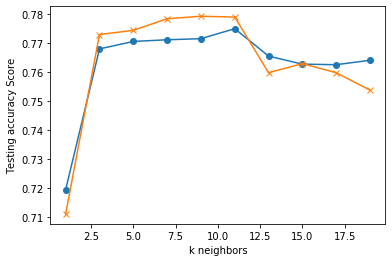

In [39]:
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    # create the classifier for each value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #Score with both test and train data
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k=3 Test Acc: 0.763


In [41]:
new_hc_data = [[1,1,1,3,1,1,0,1,1,0,1]]
predicted_class = knn.predict(new_hc_data)
print(predicted_class)

[1.]


In [42]:
# centers_with_county_ranks['Health Center Site Population Type Code'].value_counts()

4.0    6487
1.0    4208
2.0    3221
3.0      60
Name: Health Center Site Population Type Code, dtype: int64